In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15, 8]

## Exploratory Data Analysis
The data utilized for this study is data pulled from three sources.

* Tokyo Olympics Dataset (Webscrapping)
* GDP Dataset (Webscrapping)
* Tokyo Olympics Dataset Teams (Kaggle)

For the class DS5100 in the Program for MSDS at University of Virginia, explored ways to analysis the data pulled from these three sources. In this notebook we do some EDA to see any relationships of data with one another.

In [9]:
original = pd.read_csv('../../data/final_olympic_cont.csv', index_col=[0])

## Drop NaN
df = original.dropna()

# Transform Variable
df["GDP"] = df["GDP"].map(lambda x: int(x[1:].replace(",","")))
df["GDP per capita"] = df["GDP per capita"].map(lambda x: int(x[1:].replace(",","")))
df["Population"] = df["Population"].map(lambda x: int(x.replace(",","")))
df["GDP growth"] = df["GDP growth"].map(lambda x: x[:-1]).astype(float)
df.head()

,Name,Gold,Silver,Bronze,Total,Country,GDP,GDP abbreviated,GDP growth,Population,GDP per capita,NOC,Discipline,Continents
0,USA United States of America,39,41,33,113,United States,19485394000000,$19.485 trillion,2.27,325084756,59939,United States of America,47,North America
1,CHN People's Republic of China,38,32,18,88,China,12237700479375,$12.238 trillion,6.90,1421021791,8612,People's Republic of China,33,Asia
2,JPN Japan,27,14,17,58,Japan,4872415104315,$4.872 trillion,1.71,127502725,38214,Japan,48,Asia
3,GBR Great Britain,22,21,22,65,United Kingdom,2637866340434,$2.638 trillion,1.79,66727461,39532,Great Britain,28,Europe
4,ROC ROC,20,28,23,71,Russia,1578417211937,$1.578 trillion,1.55,145530082,10846,ROC,34,Asia


Distributions of Medals by Continents

In [96]:
continent_medals = df.groupby("Continents")["Gold","Silver","Bronze"].mean()
continent_medals

,Gold,Silver,Bronze
Continents,,,
Africa,0.888889,1.000000,1.111111
Asia,5.888889,5.222222,6.111111
Australia,8.333333,4.333333,10.000000
Europe,3.966667,4.366667,5.266667
North America,8.428571,7.714286,8.428571
South America,2.250000,3.000000,2.750000


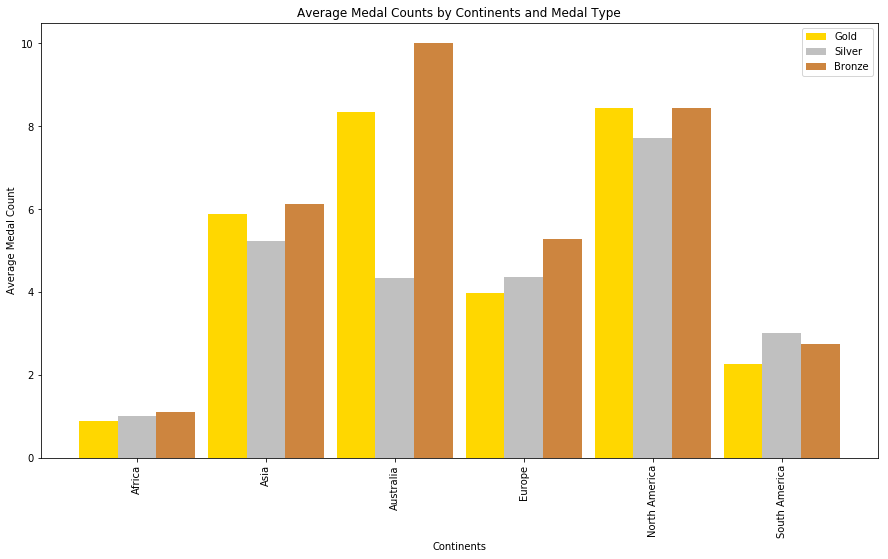

In [100]:
N = len(continent_medals)
gold = continent_medals["Gold"]
silver = continent_medals["Silver"]
bronze = continent_medals["Bronze"]

ind = np.arange(N)
width = 0.3   
plt.bar(ind, gold, width, label='Gold', color="Gold")
plt.bar(ind + width, silver, width,label='Silver', color="Silver")
plt.bar(ind + width + width, bronze, width,label='Bronze', color="#CD853F")

plt.ylabel('Average Medal Count')
plt.title('Average Medal Counts by Continents and Medal Type')
plt.xlabel('Continents')

plt.xticks(ind + width, continent_medals.index, rotation='vertical')
plt.legend(loc='best')
plt.savefig('../resources/medal_summary_by_cont.png')
plt.show()

Relationship between GDP and Total Medal Count

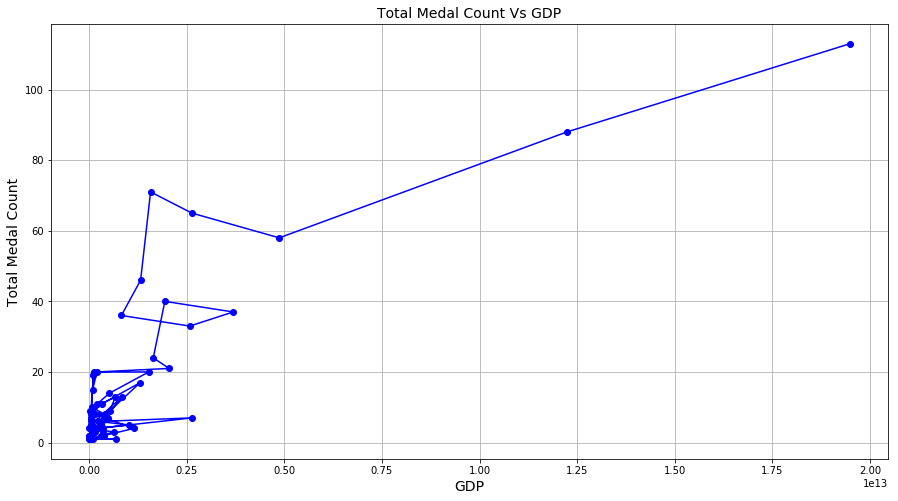

In [101]:
gdp = df["GDP"]
total = df["Total"]
  
plt.plot(gdp, total, color='blue', marker='o')
plt.title('Total Medal Count Vs GDP', fontsize=14)
plt.xlabel('GDP', fontsize=14)
plt.ylabel('Total Medal Count', fontsize=14)
plt.grid(True)
plt.savefig('../resources/medal_count_by_gdp.png')
plt.show()

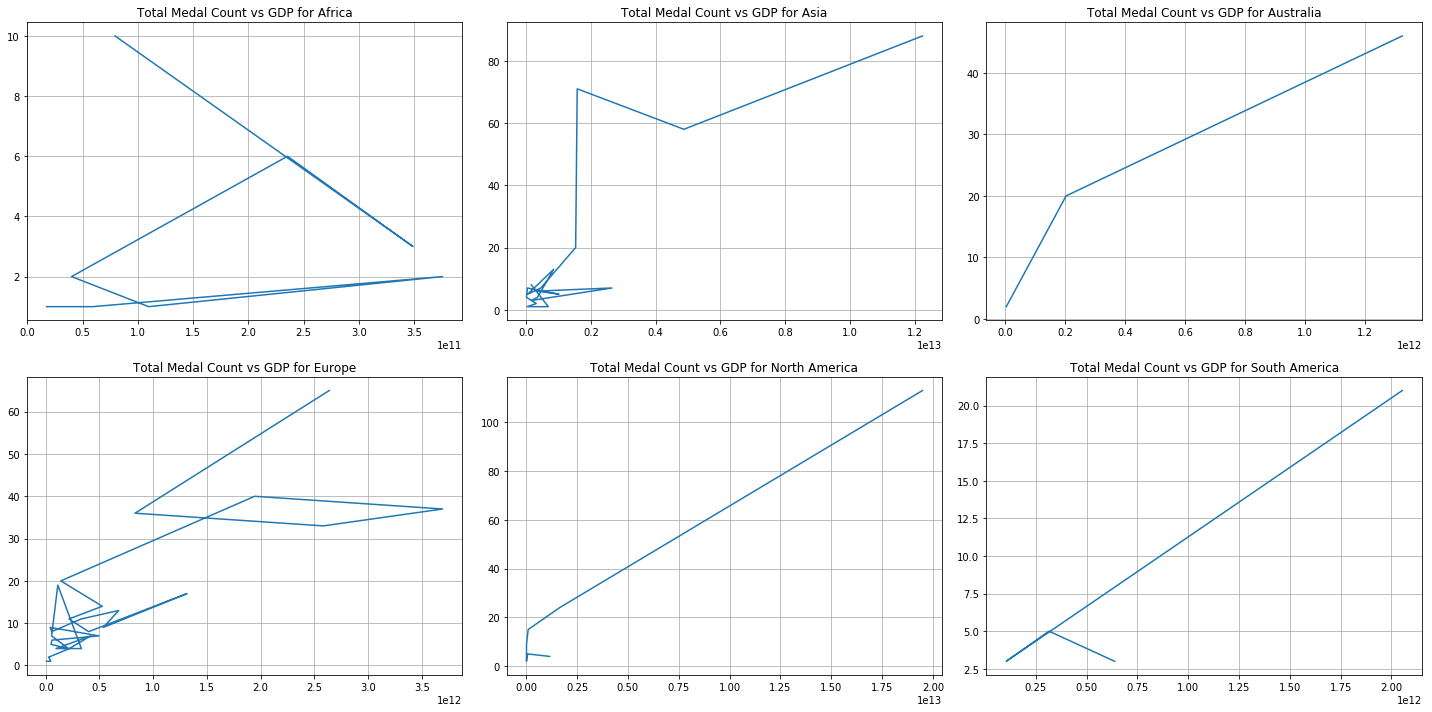

In [102]:
plt.rcParams['figure.figsize'] = [20, 10]

continents = np.unique(df["Continents"])
grouped = []
for i in range(0,len(continents)):
    temp = df[df["Continents"] == continents[i]]
    gdp = temp["GDP"]
    total = temp["Total"]
    grouped.append([gdp,total, "Total Medal Count vs GDP for {}".format(continents[i])])
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(grouped[0][0], grouped[0][1])
axs[0, 0].grid(True)
axs[0, 0].set_title(grouped[0][2])
axs[0, 1].plot(grouped[1][0], grouped[1][1])
axs[0, 1].grid(True)
axs[0, 1].set_title(grouped[1][2])
axs[0, 2].plot(grouped[2][0], grouped[2][1])
axs[0, 2].grid(True)
axs[0, 2].set_title(grouped[2][2])
axs[1, 0].plot(grouped[3][0], grouped[3][1])
axs[1, 0].grid(True)
axs[1, 0].set_title(grouped[3][2])
axs[1, 1].plot(grouped[4][0], grouped[4][1])
axs[1, 1].grid(True)
axs[1, 1].set_title(grouped[4][2])
axs[1, 2].plot(grouped[5][0], grouped[5][1])
axs[1, 2].grid(True)
axs[1, 2].set_title(grouped[5][2])
fig.savefig('../resources/medal_count_by_gdp_by_cont.png')
fig.tight_layout()

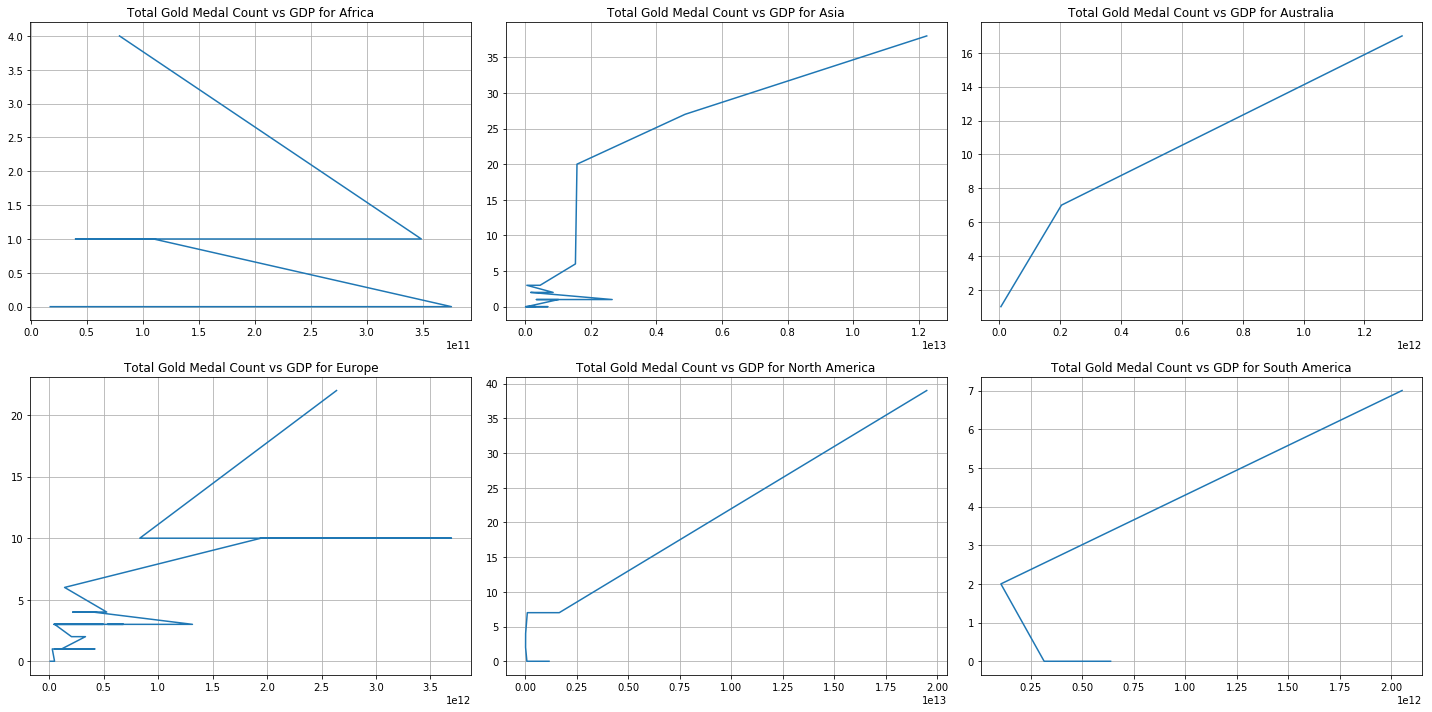

In [103]:
continents = np.unique(df["Continents"])
grouped = []
for i in range(0,len(continents)):
    temp = df[df["Continents"] == continents[i]]
    gdp = temp["GDP"]
    gold = temp["Gold"]
    grouped.append([gdp,gold, "Total Gold Medal Count vs GDP for {}".format(continents[i])])
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(grouped[0][0], grouped[0][1])
axs[0, 0].grid(True)
axs[0, 0].set_title(grouped[0][2])
axs[0, 1].plot(grouped[1][0], grouped[1][1])
axs[0, 1].grid(True)
axs[0, 1].set_title(grouped[1][2])
axs[0, 2].plot(grouped[2][0], grouped[2][1])
axs[0, 2].grid(True)
axs[0, 2].set_title(grouped[2][2])
axs[1, 0].plot(grouped[3][0], grouped[3][1])
axs[1, 0].grid(True)
axs[1, 0].set_title(grouped[3][2])
axs[1, 1].plot(grouped[4][0], grouped[4][1])
axs[1, 1].grid(True)
axs[1, 1].set_title(grouped[4][2])
axs[1, 2].plot(grouped[5][0], grouped[5][1])
axs[1, 2].grid(True)
axs[1, 2].set_title(grouped[5][2])
fig.savefig('../resources/medal_gold_count_by_gdp_by_cont.png')
fig.tight_layout()

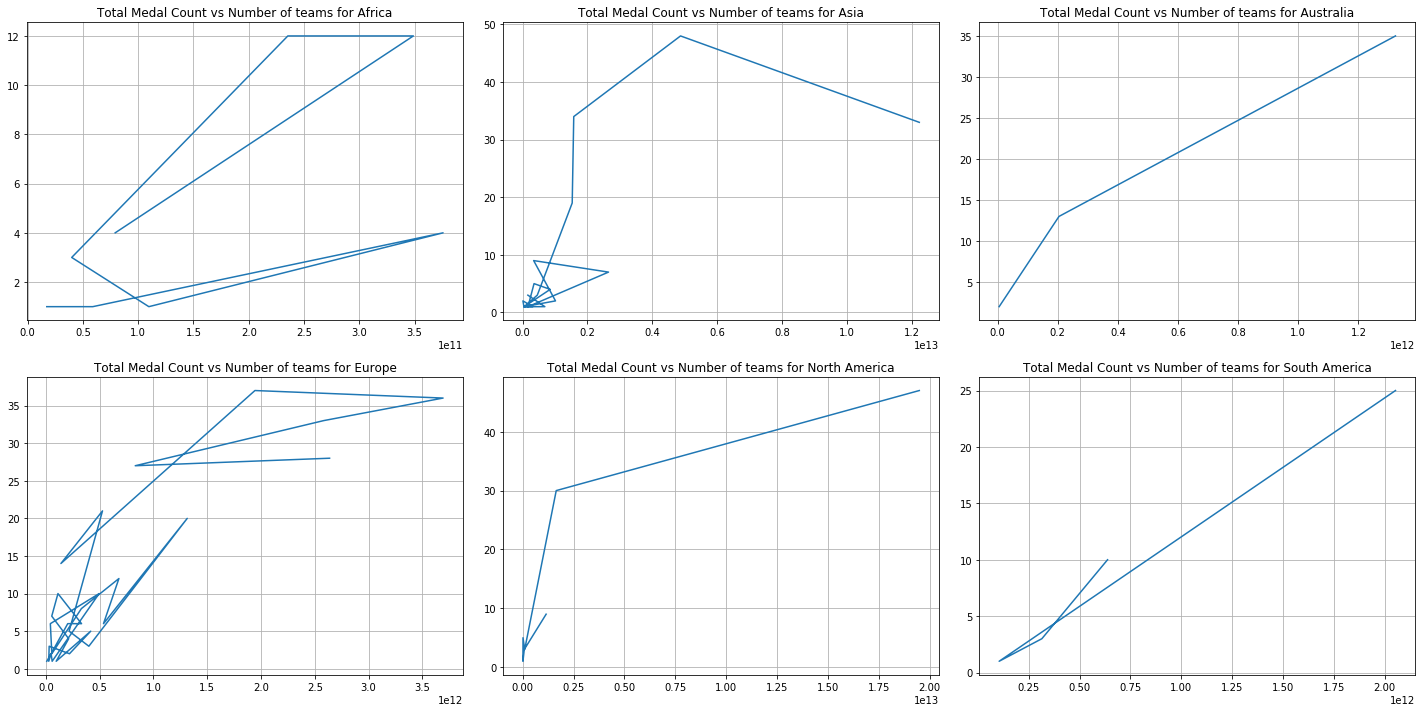

In [104]:
plt.rcParams['figure.figsize'] = [20, 10]

continents = np.unique(df["Continents"])
grouped = []
for i in range(0,len(continents)):
    temp = df[df["Continents"] == continents[i]]
    gdp = temp["GDP"]
    teams = temp["Discipline"]
    grouped.append([gdp,teams, "Total Medal Count vs Number of teams for {}".format(continents[i])])
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(grouped[0][0], grouped[0][1])
axs[0, 0].grid(True)
axs[0, 0].set_title(grouped[0][2])
axs[0, 1].plot(grouped[1][0], grouped[1][1])
axs[0, 1].grid(True)
axs[0, 1].set_title(grouped[1][2])
axs[0, 2].plot(grouped[2][0], grouped[2][1])
axs[0, 2].grid(True)
axs[0, 2].set_title(grouped[2][2])
axs[1, 0].plot(grouped[3][0], grouped[3][1])
axs[1, 0].grid(True)
axs[1, 0].set_title(grouped[3][2])
axs[1, 1].plot(grouped[4][0], grouped[4][1])
axs[1, 1].grid(True)
axs[1, 1].set_title(grouped[4][2])
axs[1, 2].plot(grouped[5][0], grouped[5][1])
axs[1, 2].grid(True)
axs[1, 2].set_title(grouped[5][2])
fig.savefig('../resources/medal_count_by_teams_by_cont.png')
fig.tight_layout()